In [2]:
import qiime2 as q2 
import pandas as pd
import numpy as np
import scipy.stats as ss
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import biom

from qiime2.plugins import diversity

## load data 

In [3]:
data_dir = '../Updated_Data/RF_Data/LIBR_Data/'
data_dict_16s = {
    'ANX': biom.load_table(data_dir + 'Amp_ANX_uncollapsed.biom'),
    'ANX_ONLY': biom.load_table(data_dir + 'Amp_ANX_ONLY_uncollapsed.biom'),
    'MDD': biom.load_table(data_dir + 'Amp_MDD_uncollapsed.biom'),
    'MDD_ONLY': biom.load_table(data_dir + 'Amp_MDD_ONLY_uncollapsed.biom'), 
    'ANX_OR_MDD': biom.load_table(data_dir + 'Amp_MDD_OR_ANX_uncollapsed.biom'),
    'ANX_AND_MDD': biom.load_table(data_dir + 'Amp_MDD_AND_ANX_uncollapsed.biom')
}

gg2_tree = q2.Artifact.load('../Updated_Data/2022.10.phylogeny.asv.nwk.qza')
metadata = pd.read_csv(data_dir + 'metadata.tsv', sep='\t', index_col=0)

In [4]:
def alpha(table, metric, phylogeny= None):
    if metric == "faith_pd":
        alpha_vector = diversity.pipelines.alpha_phylogenetic(table=table, phylogeny=phylogeny,
                                                              metric='faith_pd').alpha_diversity
    else:
        alpha_vector = diversity.pipelines.alpha(table=table, metric=metric).alpha_diversity
    
    return alpha_vector.view(pd.Series) 
    
def concat_and_compare_groups(table_dict, metric, metadata, phylogeny=None):
    list_of_subsets = []
    for i in table_dict:
        table = q2.Artifact.import_data('FeatureTable[Frequency]', table_dict[i])
        metadata[metric]= alpha(table, metric, phylogeny)
        subset = metadata.loc[metadata[metric].notna()]
        subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')
        list_of_subsets.append(subset[[metric, 'Subset']]) 
    concatted= pd.concat(list_of_subsets)
    hc = concatted.loc[concatted['Subset'] == "HealthyControl"]
    not_hc = concatted.loc[concatted['Subset'] != "HealthyControl"]
    hc = hc[~hc.index.duplicated()]
    return pd.concat([hc, not_hc])

In [5]:
for met in ['faith_pd', 'shannon']:  
    if met == 'faith_pd':
        alpha_results = concat_and_compare_groups(data_dict_16s, met, metadata, gg2_tree)
    else:
        alpha_results = concat_and_compare_groups(data_dict_16s, met, metadata)
    alpha_results.to_csv('../Updated_Results/' + met + '_results.csv')


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/f03a3764-597e-4a98-a198-cf64d4653b78/data/feature-table.biom -t /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/1d6fd745-9191-448c-9066-6b754e53a272/data/tree.nwk -o /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/q2-AlphaDiversityFormat-6y8mgs4h



/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_70536/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/880cb60c-95ae-4fee-a2f4-cf3776afa3a4/data/feature-table.biom -t /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/1d6fd745-9191-448c-9066-6b754e53a272/data/tree.nwk -o /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/q2-AlphaDiversityFormat-tdkffxw8



/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_70536/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/4ffe1c4a-6b0c-48f9-a5f4-248a74897e57/data/feature-table.biom -t /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/1d6fd745-9191-448c-9066-6b754e53a272/data/tree.nwk -o /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/q2-AlphaDiversityFormat-jfuyps7y



/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_70536/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/099e495a-73ca-48aa-8977-a5499f776c92/data/feature-table.biom -t /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/1d6fd745-9191-448c-9066-6b754e53a272/data/tree.nwk -o /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/q2-AlphaDiversityFormat-yq3be30y



/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_70536/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/092101b1-60d3-429b-bce3-50805a51d1f2/data/feature-table.biom -t /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/1d6fd745-9191-448c-9066-6b754e53a272/data/tree.nwk -o /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/q2-AlphaDiversityFormat-_3x7jhhq



/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_70536/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')


Running external command line application. This may print messages to stdout and/or stderr.
The command being run is below. This command cannot be manually re-run as it will depend on temporary files that no longer exist.

Command:

faithpd -i /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/9f274589-4581-49b7-99f1-acc6b4a10fc3/data/feature-table.biom -t /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/qiime2/hazedil/data/1d6fd745-9191-448c-9066-6b754e53a272/data/tree.nwk -o /var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/q2-AlphaDiversityFormat-yerpije1



/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_70536/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')
/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_70536/4181314751.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset['Subset'] = np.where(subset['GroupAssignment'] == 'Mood/Anxiety', i, 'HealthyControl')
/var/folders/67/8j7qqb5s0cv4wfqrkcwnz9880000gn/T/ipykernel_70536/4

In [6]:
faith = pd.read_csv('../Updated_Results/faith_pd_results.csv', index_col=0)
shannon = pd.read_csv('../Updated_Results/shannon_results.csv', index_col=0)

In [7]:
def get_significance(df, col_name): 
    out_df = pd.DataFrame(index=data_dict_16s.keys(), columns=['U_statistic', 'p_value'])
    for k in data_dict_16s: 
        mwu = ss.mannwhitneyu(df.loc[df.Subset == k][col_name], 
                              df.loc[df.Subset == 'HealthyControl'][col_name])
        out_df['U_statistic'][k] = mwu[0]
        out_df['p_value'][k] = np.round(mwu[1], 3)
    return out_df

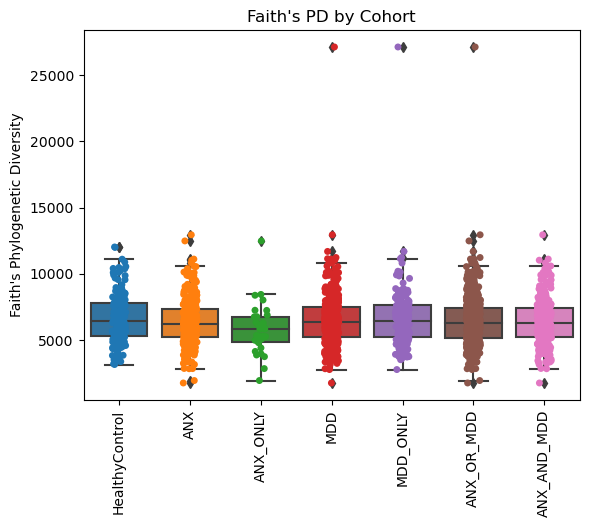

In [8]:
sns.stripplot(data=faith, x='Subset', y='faith_pd', hue='Subset')
sns.boxplot(data=faith, x='Subset', y='faith_pd')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel("Faith's Phylogenetic Diversity")
plt.title("Faith's PD by Cohort")
plt.legend([],[], frameon=False)

In [9]:
get_significance(faith, 'faith_pd')

,U_statistic,p_value
ANX,25023.0,0.143
ANX_ONLY,1874.0,0.021
MDD,36839.0,0.378
MDD_ONLY,13690.0,0.777
ANX_OR_MDD,38713.0,0.252
ANX_AND_MDD,23149.0,0.268


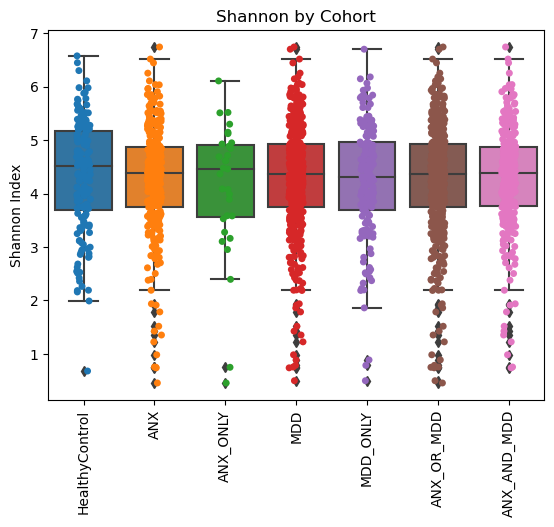

In [10]:
sns.stripplot(data=shannon, x='Subset', y='shannon', hue='Subset')
sns.boxplot(data=shannon, x='Subset', y='shannon')
plt.xticks(rotation=90)
plt.xlabel('')
plt.ylabel("Shannon Index")
plt.title("Shannon by Cohort")
plt.legend([],[], frameon=False)

In [11]:
get_significance(shannon, 'shannon')

,U_statistic,p_value
ANX,26021.0,0.423
ANX_ONLY,2329.0,0.461
MDD,36918.0,0.4
MDD_ONLY,13226.0,0.419
ANX_OR_MDD,39247.0,0.37
ANX_AND_MDD,23692.0,0.475
